In [1]:
# import library
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
x_durasi = np.arange(0,10,1)
x_compulsion = np.arange(0,10,1)
x_withdrawl = np.arange(0,15,1)
x_kecanduan = np.arange(0,15,1)

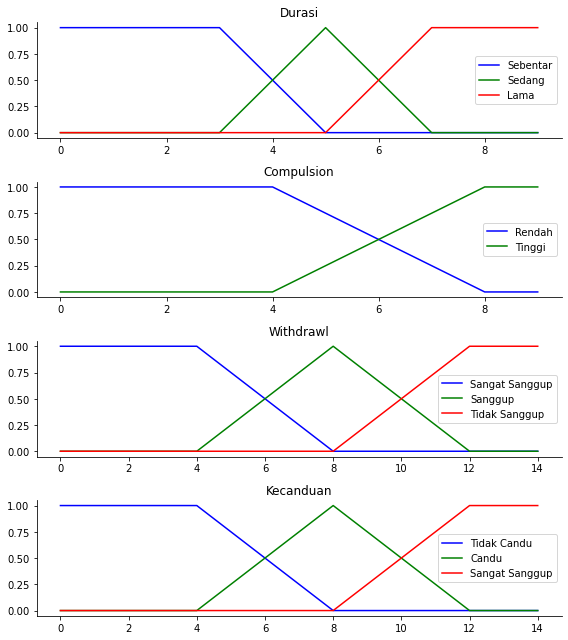

In [3]:
# durasi
durasi_sebentar = fuzz.trapmf(x_durasi,[0, 0, 3, 5])
durasi_sedang = fuzz.trimf(x_durasi,[3, 5, 7])
durasi_lama = fuzz.trapmf(x_durasi,[5, 7, 9, 9])

# compulsion
compulsion_rendah = fuzz.trapmf(x_compulsion,[0, 0, 4, 8])
compulsion_tinggi = fuzz.trapmf(x_compulsion,[4, 8, 10, 10])

# withdrawl
withdrawl_sgt_sanggup = fuzz.trapmf(x_withdrawl,[0, 0, 4, 8])
withdrawl_sanggup = fuzz.trimf(x_withdrawl,[4, 8, 12])
withdrawl_tdk_sanggup = fuzz.trapmf(x_withdrawl,[8, 12, 15, 15])

# Tingkat Kecanduan
kecanduan_tdk_candu = fuzz.trapmf(x_kecanduan,[0, 0, 4, 8])
kecanduan_candu = fuzz.trimf(x_kecanduan,[4, 8, 12])
kecanduan_sgt_candu = fuzz.trapmf(x_kecanduan,[8, 12, 15, 15])

# kurva membership
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8, 9))

ax0.plot(x_durasi, durasi_sebentar, 'b', linewidth=1.5, label='Sebentar')
ax0.plot(x_durasi, durasi_sedang, 'g', linewidth=1.5, label='Sedang')
ax0.plot(x_durasi, durasi_lama, 'r', linewidth=1.5, label='Lama')
ax0.set_title('Durasi')
ax0.legend()

ax1.plot(x_compulsion, compulsion_rendah, 'b', linewidth=1.5, label='Rendah')
ax1.plot(x_compulsion, compulsion_tinggi, 'g', linewidth=1.5, label='Tinggi')
ax1.set_title('Compulsion')
ax1.legend()

ax2.plot(x_withdrawl, withdrawl_sgt_sanggup, 'b', linewidth=1.5, label='Sangat Sanggup')
ax2.plot(x_withdrawl, withdrawl_sanggup, 'g', linewidth=1.5, label='Sanggup')
ax2.plot(x_withdrawl, withdrawl_tdk_sanggup, 'r', linewidth=1.5, label='Tidak Sanggup')
ax2.set_title('Withdrawl')
ax2.legend()

ax3.plot(x_kecanduan, kecanduan_tdk_candu, 'b', linewidth=1.5, label='Tidak Candu')
ax3.plot(x_kecanduan, kecanduan_candu, 'g', linewidth=1.5, label='Candu')
ax3.plot(x_kecanduan, kecanduan_sgt_candu, 'r', linewidth=1.5, label='Sangat Sanggup')
ax3.set_title('Kecanduan')
ax3.legend()

for ax in (ax0, ax1, ax2, ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [4]:
# Crisp Input
durasi = 5
compulsion = 7
withdrawl = 11

In [5]:
# Fuzzyfication Tsukamoto
in1 = []
in1.append(fuzz.interp_membership(x_durasi, durasi_sebentar, durasi))
in1.append(fuzz.interp_membership(x_durasi, durasi_sedang, durasi))
in1.append(fuzz.interp_membership(x_durasi, durasi_lama, durasi))

in2 = []
in2.append(fuzz.interp_membership(x_compulsion, compulsion_rendah, compulsion))
in2.append(fuzz.interp_membership(x_compulsion, compulsion_tinggi, compulsion))

in3 = []
in3.append(fuzz.interp_membership(x_withdrawl, withdrawl_sgt_sanggup, withdrawl))
in3.append(fuzz.interp_membership(x_withdrawl, withdrawl_sanggup, withdrawl))
in3.append(fuzz.interp_membership(x_withdrawl, withdrawl_tdk_sanggup, withdrawl))

print("Derajat Keanggotaan Durasi : ")
if in1[0]>0 :
    print("Sebentar : " +str(in1[0]))
if in1[1]>0 :
    print("Sedang : " +str(in1[1]))
if in1[2]>0 :
    print("Lama : " +str(in1[2]))
    
print("Derajat Keanggotaan Compulsion : ")
if in2[0]>0 :
    print("Rendah : "+str(in2[0]))
if in2[1]>0 :
    print("Tinggi : "+str(in2[1]))
    
print("Derajat Keanggotaan Withdrawl : ")
if in3[0]>0 :
    print("Sangat Sanggup : "+str(in3[0]))
if in3[1]>0 :
    print("Sanggup : "+str(in3[1]))
if in3[2]>0 :
    print("Tidak Sanggup : "+str(in3[2]))

Derajat Keanggotaan Durasi : 
Sedang : 1.0
Derajat Keanggotaan Compulsion : 
Rendah : 0.25
Tinggi : 0.75
Derajat Keanggotaan Withdrawl : 
Sanggup : 0.25
Tidak Sanggup : 0.75


In [6]:
# R8
a8      = (in1[1], in2[0], in3[1])
apred8  = min(a8)
z8      = 12-((apred8)*4)
# R9
a9      = (in1[1], in2[0], in3[2])
apred9  = min(a9)
z9      = 12-(apred9*4)
# 11
a11      = (in1[1], in2[1], in3[1])
apred11  = min(a11)
z11      = (apred11*4)+8
# 12
a12      = (in1[1], in2[1], in3[2])
apred12  = min(a12)
z12      = (apred12*4)+8

print('apred8 = ', apred8,' dan z8 = ', z8)
print('apred9 = ', apred9,' dan z8 = ', z9)
print('apred11 = ', apred11,' dan z11 = ', z11)
print('apred12 = ', apred12,' dan z12 = ', z12)

apred8 =  0.25  dan z8 =  11.0
apred9 =  0.25  dan z8 =  11.0
apred11 =  0.25  dan z11 =  9.0
apred12 =  0.75  dan z12 =  11.0


In [7]:
z = ((apred8*z8)+(apred9*z9)+(apred11*z11)+(apred12*z12))/(apred8+apred9+apred11+apred12)
# round untuk pembulatan pecahan 2 angka dibelakang koma
print("Nilai Kecanduan Anak adalah = ", round(z,2))

Nilai Kecanduan Anak adalah =  10.67
